In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

**Matriz de riesgo de innovación**

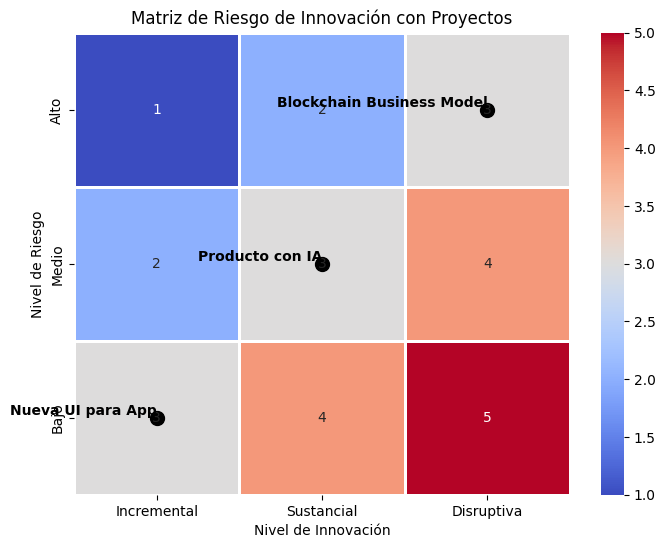

In [ ]:
niveles_innovacion = ["Incremental", "Sustancial", "Disruptiva"]
niveles_riesgo = ["Bajo", "Medio", "Alto"]

matriz_riesgo = pd.DataFrame(np.zeros((3, 3)), index=niveles_riesgo, columns=niveles_innovacion)

for i, riesgo in enumerate(niveles_riesgo):
    for j, innovacion in enumerate(niveles_innovacion):
        matriz_riesgo.loc[riesgo, innovacion] = i + j + 1  

proyectos = [
    {"nombre": "Nueva UI para App", "innovacion": "Incremental", "riesgo": "Bajo"},
    {"nombre": "Producto con IA", "innovacion": "Sustancial", "riesgo": "Medio"},
    {"nombre": "Blockchain Business Model", "innovacion": "Disruptiva", "riesgo": "Alto"}
]

mapa_x = {valor: i + 0.5 for i, valor in enumerate(niveles_innovacion)}
mapa_y = {valor: 2.5 - i for i, valor in enumerate(niveles_riesgo)}  

# Crear heatmap
plt.figure(figsize=(8, 6))
ax = sns.heatmap(matriz_riesgo, annot=True, cmap="coolwarm", linewidths=1, fmt=".0f")

for proyecto in proyectos:
    x = mapa_x[proyecto["innovacion"]]
    y = mapa_y[proyecto["riesgo"]]
    plt.scatter(x, y, color="black", s=100, label=proyecto["nombre"])
    plt.text(x, y, proyecto["nombre"], color="black", fontsize=10, ha="right", va="bottom", weight="bold")

plt.title("Matriz de Riesgo de Innovación con Proyectos")
plt.xlabel("Nivel de Innovación")
plt.ylabel("Nivel de Riesgo")
plt.xticks(ticks=[i + 0.5 for i in range(3)], labels=niveles_innovacion)
plt.yticks(ticks=[2.5 - i for i in range(3)], labels=niveles_riesgo)
plt.show()

**FMEA**


 Análisis FMEA para IA Generativa:
                       Modo de Falla  Severidad  Ocurrencia  Detección  RPN
4           Costo computacional alto          6           8          7  336
1  Alucinaciones (información falsa)          9           6          6  324
0            Sesgo en las respuestas          8           7          5  280
2    Respuestas tóxicas o no seguras         10           5          4  200
3            Riesgo de fuga de datos          9           4          5  180


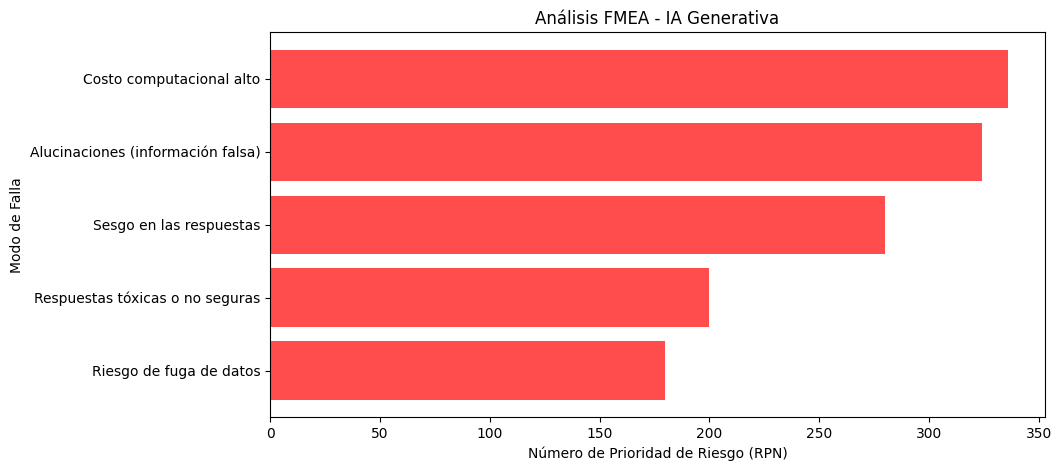

In [8]:
fallas_ia = [
    {"Modo de Falla": "Sesgo en las respuestas", "Severidad": 8, "Ocurrencia": 7, "Detección": 5},
    {"Modo de Falla": "Alucinaciones (información falsa)", "Severidad": 9, "Ocurrencia": 6, "Detección": 6},
    {"Modo de Falla": "Respuestas tóxicas o no seguras", "Severidad": 10, "Ocurrencia": 5, "Detección": 4},
    {"Modo de Falla": "Riesgo de fuga de datos", "Severidad": 9, "Ocurrencia": 4, "Detección": 5},
    {"Modo de Falla": "Costo computacional alto", "Severidad": 6, "Ocurrencia": 8, "Detección": 7},
]

df_ia = pd.DataFrame(fallas_ia)

df_ia["RPN"] = df_ia["Severidad"] * df_ia["Ocurrencia"] * df_ia["Detección"]

df_ia = df_ia.sort_values(by="RPN", ascending=False)

print("\n Análisis FMEA para IA Generativa:")
print(df_ia)

plt.figure(figsize=(10, 5))
plt.barh(df_ia["Modo de Falla"], df_ia["RPN"], color="red", alpha=0.7)
plt.xlabel("Número de Prioridad de Riesgo (RPN)")
plt.ylabel("Modo de Falla")
plt.title("Análisis FMEA - IA Generativa")
plt.gca().invert_yaxis()  
plt.show()